# A set of visualization to ensure the correctness of program

In [1]:
from __future__ import print_function
from utils.data import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

### Visualize the open, high, low, close of 16 target stocks from 2012-8-13 to 2017-8-11

In [18]:
history, abbreviation = read_stock_history(filepath='utils/datasets/stocks_history_target.h5')
history = history[:, :, :]
# delete ebay
history = np.delete(history, 7, axis=0)
abbreviation.pop(7)
history_T = history.transpose((0, 2, 1))
# create x tick
date_list = [index_to_date(i) for i in range(history.shape[1])]
x = range(history.shape[1])

In [19]:
print(date_list[0], date_list[-1])

2012-08-13 2017-08-11


In [20]:
### show 16 stock of open price
if False:
    for i in range(len(abbreviation)):
        plt.figure(i)
        plt.plot(x, history_T[i][1])  # open, high, low, close = [0, 1, 2, 3]
        plt.xticks(x[::365], date_list[::365], rotation=30)
        plt.title(abbreviation[i])
        plt.show()

In [31]:
trough = returns[returns.argmax():].min()

NameError: name 'returns' is not defined

### Plot a random action chosen on 16 stocks to test the simulator

In [21]:
from environment.portfolio import *

In [22]:
env = PortfolioEnv(history, abbreviation)
env.reset()

Start date: 2013-10-26


(array([[[  1.  ,   1.  ,   1.  ,   1.  ],
         [  1.  ,   1.  ,   1.  ,   1.  ],
         [  1.  ,   1.  ,   1.  ,   1.  ],
         ...,
         [  1.  ,   1.  ,   1.  ,   1.  ],
         [  1.  ,   1.  ,   1.  ,   1.  ],
         [  1.  ,   1.  ,   1.  ,   1.  ]],
 
        [[ 92.31,  92.77,  91.8 ,  92.48],
         [ 92.84,  93.04,  92.07,  92.22],
         [ 92.84,  93.04,  92.07,  92.22],
         ...,
         [ 94.68,  94.89,  94.12,  94.72],
         [ 95.42,  97.88,  95.17,  97.19],
         [ 97.04,  97.32,  96.42,  97.03]],
 
        [[ 20.8 ,  20.81,  20.36,  20.71],
         [ 20.94,  21.  ,  20.74,  20.92],
         [ 20.94,  21.  ,  20.74,  20.92],
         ...,
         [ 22.93,  22.97,  22.68,  22.94],
         [ 23.07,  23.3 ,  22.99,  23.12],
         [ 23.2 ,  23.24,  23.08,  23.19]],
 
        ...,
 
        [[ 61.95,  62.36,  61.57,  62.31],
         [ 62.32,  62.86,  62.28,  62.85],
         [ 62.32,  62.86,  62.28,  62.85],
         ...,
         [ 65.37,

Total reward 0.3686958753524948


<Figure size 432x288 with 0 Axes>

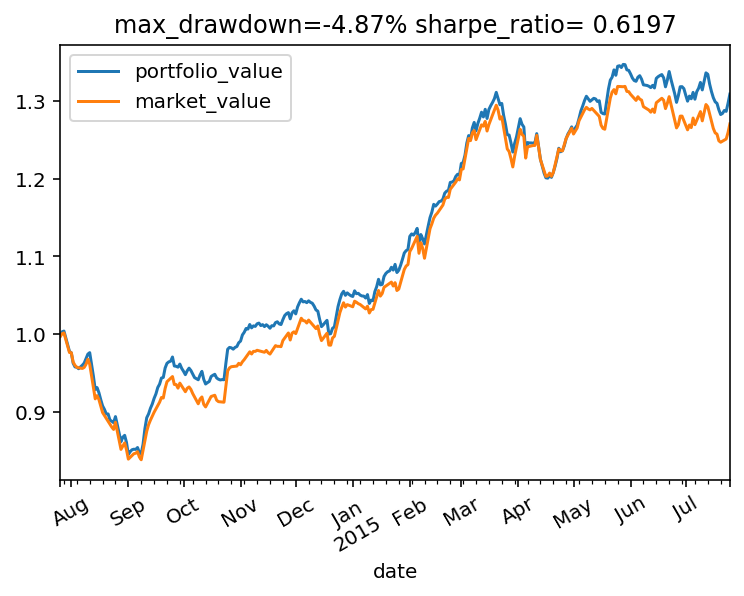

In [23]:
total_reward = 0.
for i in range(365):
    action = env.action_space.sample()
    action /= action.sum()
    observation, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        break
print('Total reward', total_reward)
env.render()

In [24]:
obs = env.reset()

### We don't make any investment to make sure the profit doesn't change. In reality, there is a $eps$ change from 1 because we introduce $eps$ to avoid zero division.

In [28]:
env = PortfolioEnv(history, abbreviation, sample_start_date='2015-01-20')
done = False
while not done:
    action = np.array([1.0] + history.shape[0] * [0.0])
    observation, reward, done, info = env.step(action)
env.render()

Start date: 2015-01-20


KeyError: "Cannot get left slice bound for non-unique label: Timestamp('2014-10-15 00:00:00')"

### Try equally invest everything, the expected curve should match market_value

In [29]:
env = PortfolioEnv(history, abbreviation, trading_cost=0.0)
for i in range(200):
    action = np.ones((history.shape[0] + 1)) / (history.shape[0] + 1)
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()

Start date: 2015-07-20


KeyError: "Cannot get left slice bound for non-unique label: Timestamp('2014-10-15 00:00:00')"

In [30]:
# optimal action
env = PortfolioEnv(history, abbreviation, trading_cost=0.0)
observation, info = env.reset()
done = False
while not done:
    current_action = np.zeros((history.shape[0] + 1,))
    next_obs = info['next_obs']
    next_obs = next_obs[:, :, 3] / next_obs[:, :, 0]
    current_action[np.argmax(next_obs)] = 1.0
    observation, reward, done, info = env.step(current_action)
    assert (observation[:, -1, 3] / observation[:, -1, 0] - next_obs).sum() == 0.0
    assert reward >= 0.0
env.render()

Start date: 2015-06-14


AssertionError: 